In [2]:
# Load packages
import pandas as pd
# Load pacgages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import spacy

from matplotlib.patches import Patch

# Set the font
plt.rcParams['font.family'] = 'Times New Roman'

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [3]:
# Load data
df = pd.read_csv('cyber-operations-incidents.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         768 non-null    object
 1   Date          753 non-null    object
 2   Affiliations  621 non-null    object
 3   Description   768 non-null    object
 4   Response      186 non-null    object
 5   Victims       741 non-null    object
 6   Sponsor       728 non-null    object
 7   Type          731 non-null    object
 8   Category      743 non-null    object
 9   Sources_1     763 non-null    object
 10  Sources_2     488 non-null    object
 11  Sources_3     190 non-null    object
dtypes: object(12)
memory usage: 72.1+ KB


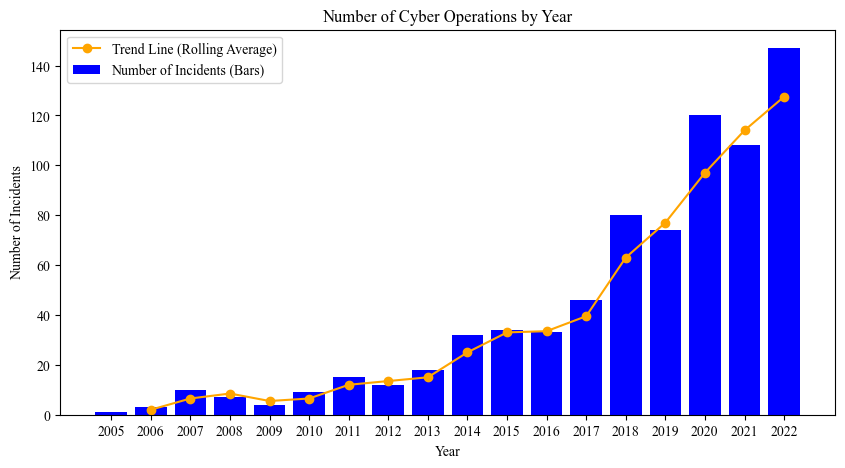

In [4]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with missing or non-finite values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Extract the year and convert it to an integer
df['Year'] = df['Date'].dt.year.astype(int)

# Plot the number of incidents per year as bars
yearly_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts.index, yearly_counts.values, color='blue', label='Number of Incidents (Bars)')

# Calculate a trend line (e.g., a rolling average)
rolling_avg = yearly_counts.rolling(window=2).mean()  # Adjust the window size as needed
plt.plot(rolling_avg.index, rolling_avg.values, color='orange', linestyle='-', marker='o', label='Trend Line (Rolling Average)')

# Title and labels
plt.title('Number of Cyber Operations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(yearly_counts.index)  # Set x-axis ticks as integers

# Show the plot
plt.legend()
plt.show()

In [5]:
# Filter the DataFrame for records in 2019 and 2020
df['Date'] = pd.to_datetime(df['Date'])  # Convert "Date" column to datetime
cyberattacks_2019 = df[df['Date'].dt.year == 2019].shape[0]
cyberattacks_2020 = df[df['Date'].dt.year == 2020].shape[0]

# Calculate the percentage increase
percentage_increase = ((cyberattacks_2020 - cyberattacks_2019) / cyberattacks_2019) * 100

# Print the result
print(f"The percentage increase in cyberattacks from 2019 to 2020 is: {percentage_increase:.2f}%")

The percentage increase in cyberattacks from 2019 to 2020 is: 62.16%


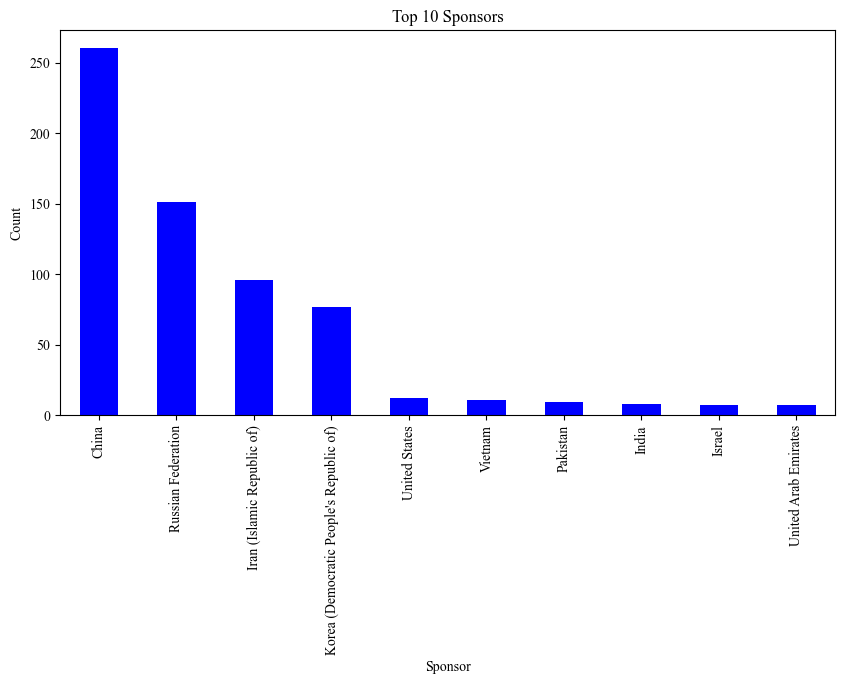

In [6]:
# Plot the top 10 Sponsors
top_sponsors = df['Sponsor'].value_counts().nlargest(10)
top_sponsors.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Top 10 Sponsors')
plt.xlabel('Sponsor')
plt.ylabel('Count')
plt.xticks(rotation=90);

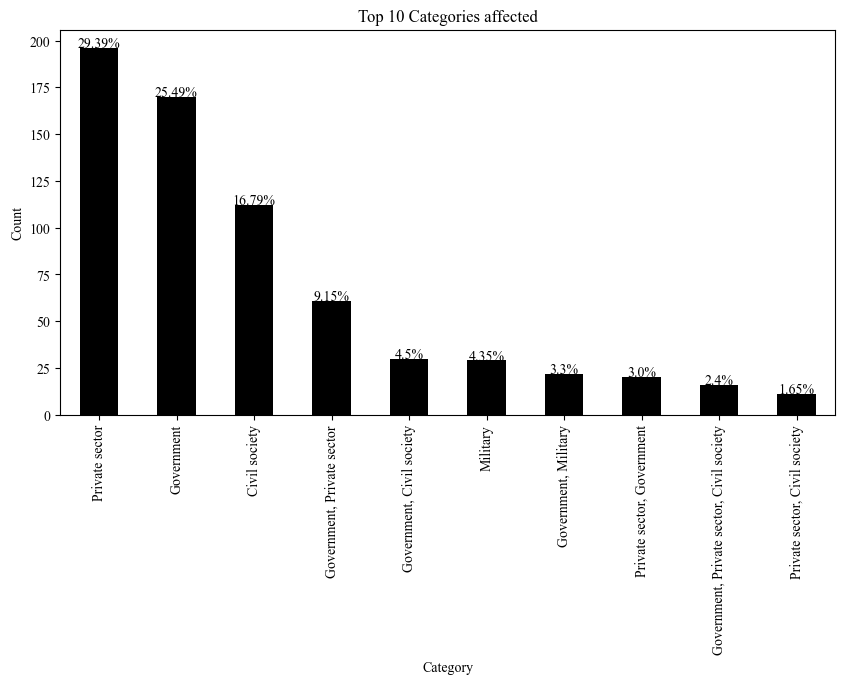

In [7]:
# Plot the most affected category
top_category = df['Category'].value_counts().nlargest(10)

top_category.plot(kind='bar', figsize=(10, 5), color='black')
plt.title('Top 10 Categories affected')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show percentages with adjusted x-coordinate
for i, v in enumerate(top_category):
    plt.text(i, v + 0.25, str(round((v / top_category.sum()) * 100, 2)) + '%', color='black', ha='center')

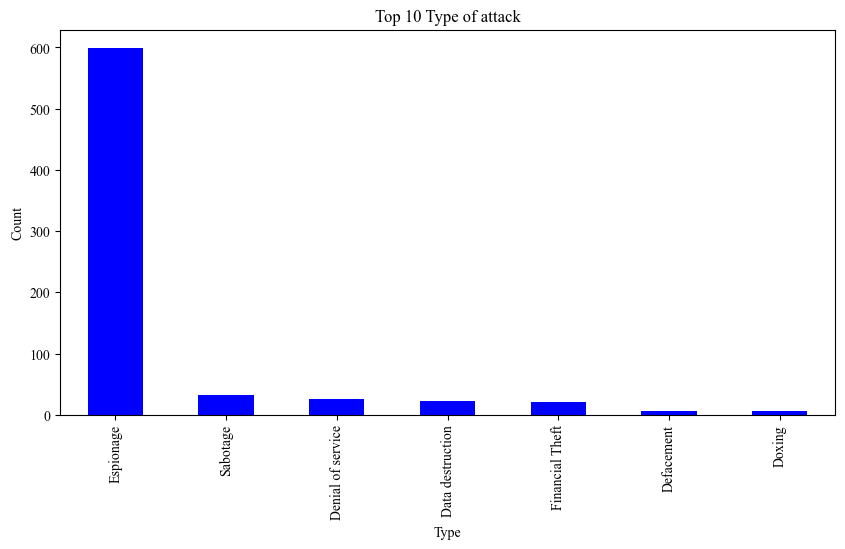

In [8]:
# Plot the most affected category
top_category = df['Type'].value_counts().nlargest(7)

top_category.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Top 10 Type of attack')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [11]:
df.columns

Index(['Title', 'Date', 'Affiliations', 'Description', 'Response', 'Victims',
       'Sponsor', 'Type', 'Category', 'Sources_1', 'Sources_2', 'Sources_3',
       'Year'],
      dtype='object')

TypeError: 'NoneType' object is not subscriptable